In [4]:
import sys
from pathlib import Path
import scanpy as sc
import matplotlib.pyplot as plt

parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

In [12]:
# cell types are simply based on the clustering, not anything else
# let's visualize these clusters using UMAP
def visualize_seurat_cluster(ann_data, data_name, cell_type, method='umap'):
    # for either of them, we need to use PCA to reduce the dimensionality
    plt.figure(figsize=(20, 15))
    
    if method == 'umap':
        # Run PCA and neighbors similar to Seurat
        sc.pp.scale(ann_data, max_value=10)
        sc.tl.pca(ann_data, svd_solver='arpack')
        sc.pp.neighbors(ann_data, n_neighbors=30, n_pcs=50)
        sc.tl.umap(ann_data, min_dist=0.3, spread=1.0)
        sc.pl.umap(
            ann_data,
            title=f'U-Map of {data_name} dataset by Cell-Type',
            color=cell_type,
            legend_loc='right margin',
            legend_fontsize=6,
            legend_fontoutline=1
        )
    else:
        sc.tl.tsne(ann_data)
        sc.pl.tsne(
            ann_data,
            title=f't-SNE of {data_name} dataset by Cell-Type',
            color=cell_type,
            legend_loc='right margin',
            legend_fontsize=6,
            legend_fontoutline=1
        )
    plt.tight_layout()        
    plt.show()

AnnData object with n_obs × n_vars = 27386 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'rt_bc', 'cell', 'time', 'percent.mt', 'percent.ribo', 'barn_dro', 'barn_hu', 'barn_mus', 'RNA_snn_res.0.8', 'doublet_score', 'predicted_doublet', 'doublet_cluster', 'seurat_clusters', 'doublet_subcluster', 'RNA_snn_res.0.08', 'lasso_age', 'NNv1_age', 'NNv2_age', 'lasso_shift', 'NNv1_shift', 'NNv2_shift', 'tp', 'n_counts_all'
    var: 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
[ Data=Dataset.DROSOPHILA | Split=three_interpolation ] Loading data...
Pre-processing...


/home/mcb/users/ehuang14/fcg-project/scNODE/benchmark/BenchmarkUtils.py:412: FutureWarning: Use sc.pp.normalize_total instead
  scanpy.pp.normalize_per_cell(  # normalize with total UMI count per cell
/home/mcb/users/ehuang14/fcg-project/scNODE/venv/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:591: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(


<Figure size 2000x1500 with 0 Axes>

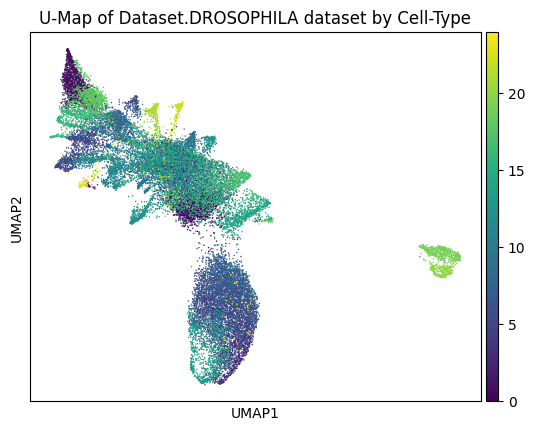

<Figure size 640x480 with 0 Axes>

In [13]:
# test_dataset.py
# used to test the data and examine the dataset
from benchmark.BenchmarkUtils import (
    loadSCData,
    tpSplitInd,
    tunedOurPars,
    splitBySpec,
    Dataset,
    get_cell_type_name
)

data_name = Dataset.DROSOPHILA
split_type = "three_interpolation"
cell_type = get_cell_type_name(data_name) + 's'

print(ann_data)
# 27000 cells by 2000 genes (HSGs)
ann_data, cell_tps, cell_types, n_genes, n_tps = loadSCData(data_name, split_type, path_to_dir='../../')

visualize_seurat_cluster(ann_data, data_name, cell_type)